<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass14_DecisionTree(Company_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Liebraries**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

!pip install category_encoders - convert into category

In [27]:
!pip install category_encoders

# **Load data set**

In [28]:
data = pd.read_csv('/content/Company_Data.csv')

# **EDA**

In [29]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### **Data Structure**

In [30]:
data.shape

(400, 11)

### **Data types**

In [31]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### **Finding and removing NA values**

In [33]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [34]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [35]:
# This is y variable
data.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

## **Category Encoder**

In [36]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company = encoder.fit_transform(data)

## **Convert and Add Company column **

In [37]:
company_val = []
for value in data["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

company["Company_Val"]= company_val

In [38]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Company_Val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low


In [39]:
# This is y variable
company.Company_Val.value_counts()

low     201
high    199
Name: Company_Val, dtype: int64

# **Split Data in X and Y**

In [41]:
x = company.drop(['Company_Val','Sales'], axis =1)
y = company['Company_Val']

In [42]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [43]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: Company_Val, Length: 400, dtype: object

### **Display unique values**

In [45]:
company['Company_Val'].unique()

array(['high', 'low'], dtype=object)

# **Display columns name**

In [47]:
columns = list(company.columns)
columns

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Company_Val']

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Company_Val']

# **Split entire data in train data test data**

In [49]:
# 20%  test data 80% train
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [50]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,125,103,0,304,112,3,49,13,2,2
69,127,59,0,339,99,3,65,12,1,2
203,131,82,0,132,157,1,25,14,1,2
379,125,111,0,404,107,1,54,15,1,2
261,121,42,4,188,118,3,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,3,48,12,1,1
165,147,58,7,100,191,1,27,15,1,1
7,136,81,15,425,120,2,67,10,1,1
219,116,79,19,359,116,2,58,17,1,1


In [51]:
x_train.shape

(320, 10)

In [52]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,125,87,9,232,136,2,72,10,1,1
390,108,75,9,61,111,3,67,12,1,1
310,175,65,29,419,166,3,53,12,1,1
3,117,100,4,466,97,3,55,14,1,1
248,111,52,0,12,101,3,61,11,1,1
...,...,...,...,...,...,...,...,...,...,...
361,131,25,10,183,104,3,56,15,2,1
197,124,61,0,333,138,3,76,16,1,2
23,121,31,0,292,109,3,79,10,1,2
54,134,103,13,25,144,3,76,17,2,1


In [53]:
y_test

132    high
390     low
310    high
3       low
248     low
       ... 
361    high
197     low
23      low
54      low
58      low
Name: Company_Val, Length: 80, dtype: object

In [54]:
y_test.shape

(80,)

In [55]:
y_train

85     high
69     high
203     low
379     low
261     low
       ... 
306     low
165     low
7      high
219    high
326     low
Name: Company_Val, Length: 320, dtype: object

# **Building Decision Tree Classifier using Entropy Criteria**

In [72]:
# c5.0 model max depth = 3
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## **Predict test-train and check accuracy and change model parameters to incress accuracy**

In [73]:
#Predicting on test data
pred_test1 = model.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 68.75
Train data Accuracy is: 73.4375


In [71]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model2.fit(x_train,y_train)

#Predicting on test data
pred_test1 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 78.4375


In [70]:
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=8)
model3.fit(x_train,y_train)

#Predicting on test data
pred_test1 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 94.6875


## **Plot the Decision Tree**

[Text(0.5, 0.875, 'x[4] <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [164, 156]'),
 Text(0.25, 0.625, 'x[2] <= 11.5\nentropy = 0.969\nsamples = 245\nvalue = [148, 97]'),
 Text(0.125, 0.375, 'x[4] <= 90.5\nentropy = 0.999\nsamples = 178\nvalue = [92, 86]'),
 Text(0.0625, 0.125, 'entropy = 0.544\nsamples = 32\nvalue = [28, 4]'),
 Text(0.1875, 0.125, 'entropy = 0.989\nsamples = 146\nvalue = [64, 82]'),
 Text(0.375, 0.375, 'x[6] <= 56.5\nentropy = 0.644\nsamples = 67\nvalue = [56, 11]'),
 Text(0.3125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [35, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.907\nsamples = 31\nvalue = [21, 10]'),
 Text(0.75, 0.625, 'x[0] <= 146.5\nentropy = 0.748\nsamples = 75\nvalue = [16, 59]'),
 Text(0.625, 0.375, 'x[2] <= 23.0\nentropy = 0.497\nsamples = 55\nvalue = [6, 49]'),
 Text(0.5625, 0.125, 'entropy = 0.386\nsamples = 53\nvalue = [4, 49]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.375, 'x[4] <= 149.5\nentropy = 1.0\ns

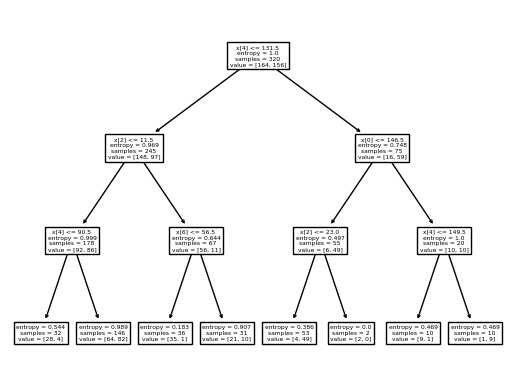

In [75]:
tree.plot_tree(model)

In [76]:
y_train.value_counts()

high    164
low     156
Name: Company_Val, dtype: int64

Butification of Tree

[Text(0.5, 0.875, 'Price <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [164, 156]\nclass = low'),
 Text(0.25, 0.625, 'Advertising <= 11.5\nentropy = 0.969\nsamples = 245\nvalue = [148, 97]\nclass = low'),
 Text(0.125, 0.375, 'Price <= 90.5\nentropy = 0.999\nsamples = 178\nvalue = [92, 86]\nclass = low'),
 Text(0.0625, 0.125, 'entropy = 0.544\nsamples = 32\nvalue = [28, 4]\nclass = low'),
 Text(0.1875, 0.125, 'entropy = 0.989\nsamples = 146\nvalue = [64, 82]\nclass = high'),
 Text(0.375, 0.375, 'Age <= 56.5\nentropy = 0.644\nsamples = 67\nvalue = [56, 11]\nclass = low'),
 Text(0.3125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [35, 1]\nclass = low'),
 Text(0.4375, 0.125, 'entropy = 0.907\nsamples = 31\nvalue = [21, 10]\nclass = low'),
 Text(0.75, 0.625, 'CompPrice <= 146.5\nentropy = 0.748\nsamples = 75\nvalue = [16, 59]\nclass = high'),
 Text(0.625, 0.375, 'Advertising <= 23.0\nentropy = 0.497\nsamples = 55\nvalue = [6, 49]\nclass = high'),
 Text(0.5625, 0.125, 'entropy = 0.386\n

<Figure size 20000x10000 with 0 Axes>

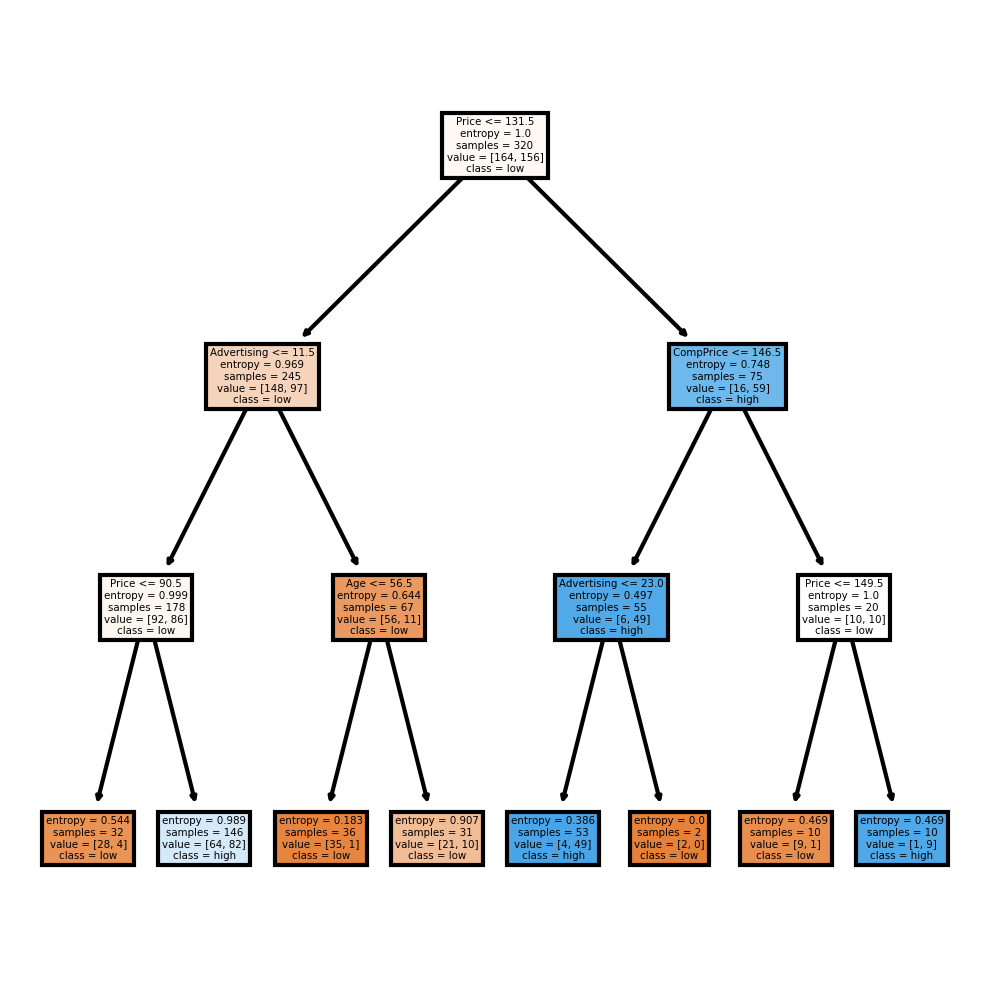

In [77]:
fig = plt.figure(figsize=(200,100))
fn=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US']
cn=['low', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True)

# **Predicting on test data**

In [78]:
pred= model.predict(x_test) # predicting on test data set
pd.Series(pred).value_counts() # getting the count of each category


low     56
high    24
dtype: int64

# **Crosstab**

In [79]:
pd.crosstab(pred,y_test)

Company_Val,high,low
row_0,,
high,17,7
low,18,38


## **Accuracy**

In [80]:
round(np.mean(pred==y_test)*100,2)

68.75

# **Building Decision Tree Classifier(CART) using Gini Criteria**

In [82]:
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

# **predict and computing the accuracy**

In [83]:
pred = model_gini.predict(x_test)
round(np.mean(pred==y_test)*100,2)

71.25

# **plot the decision tree**

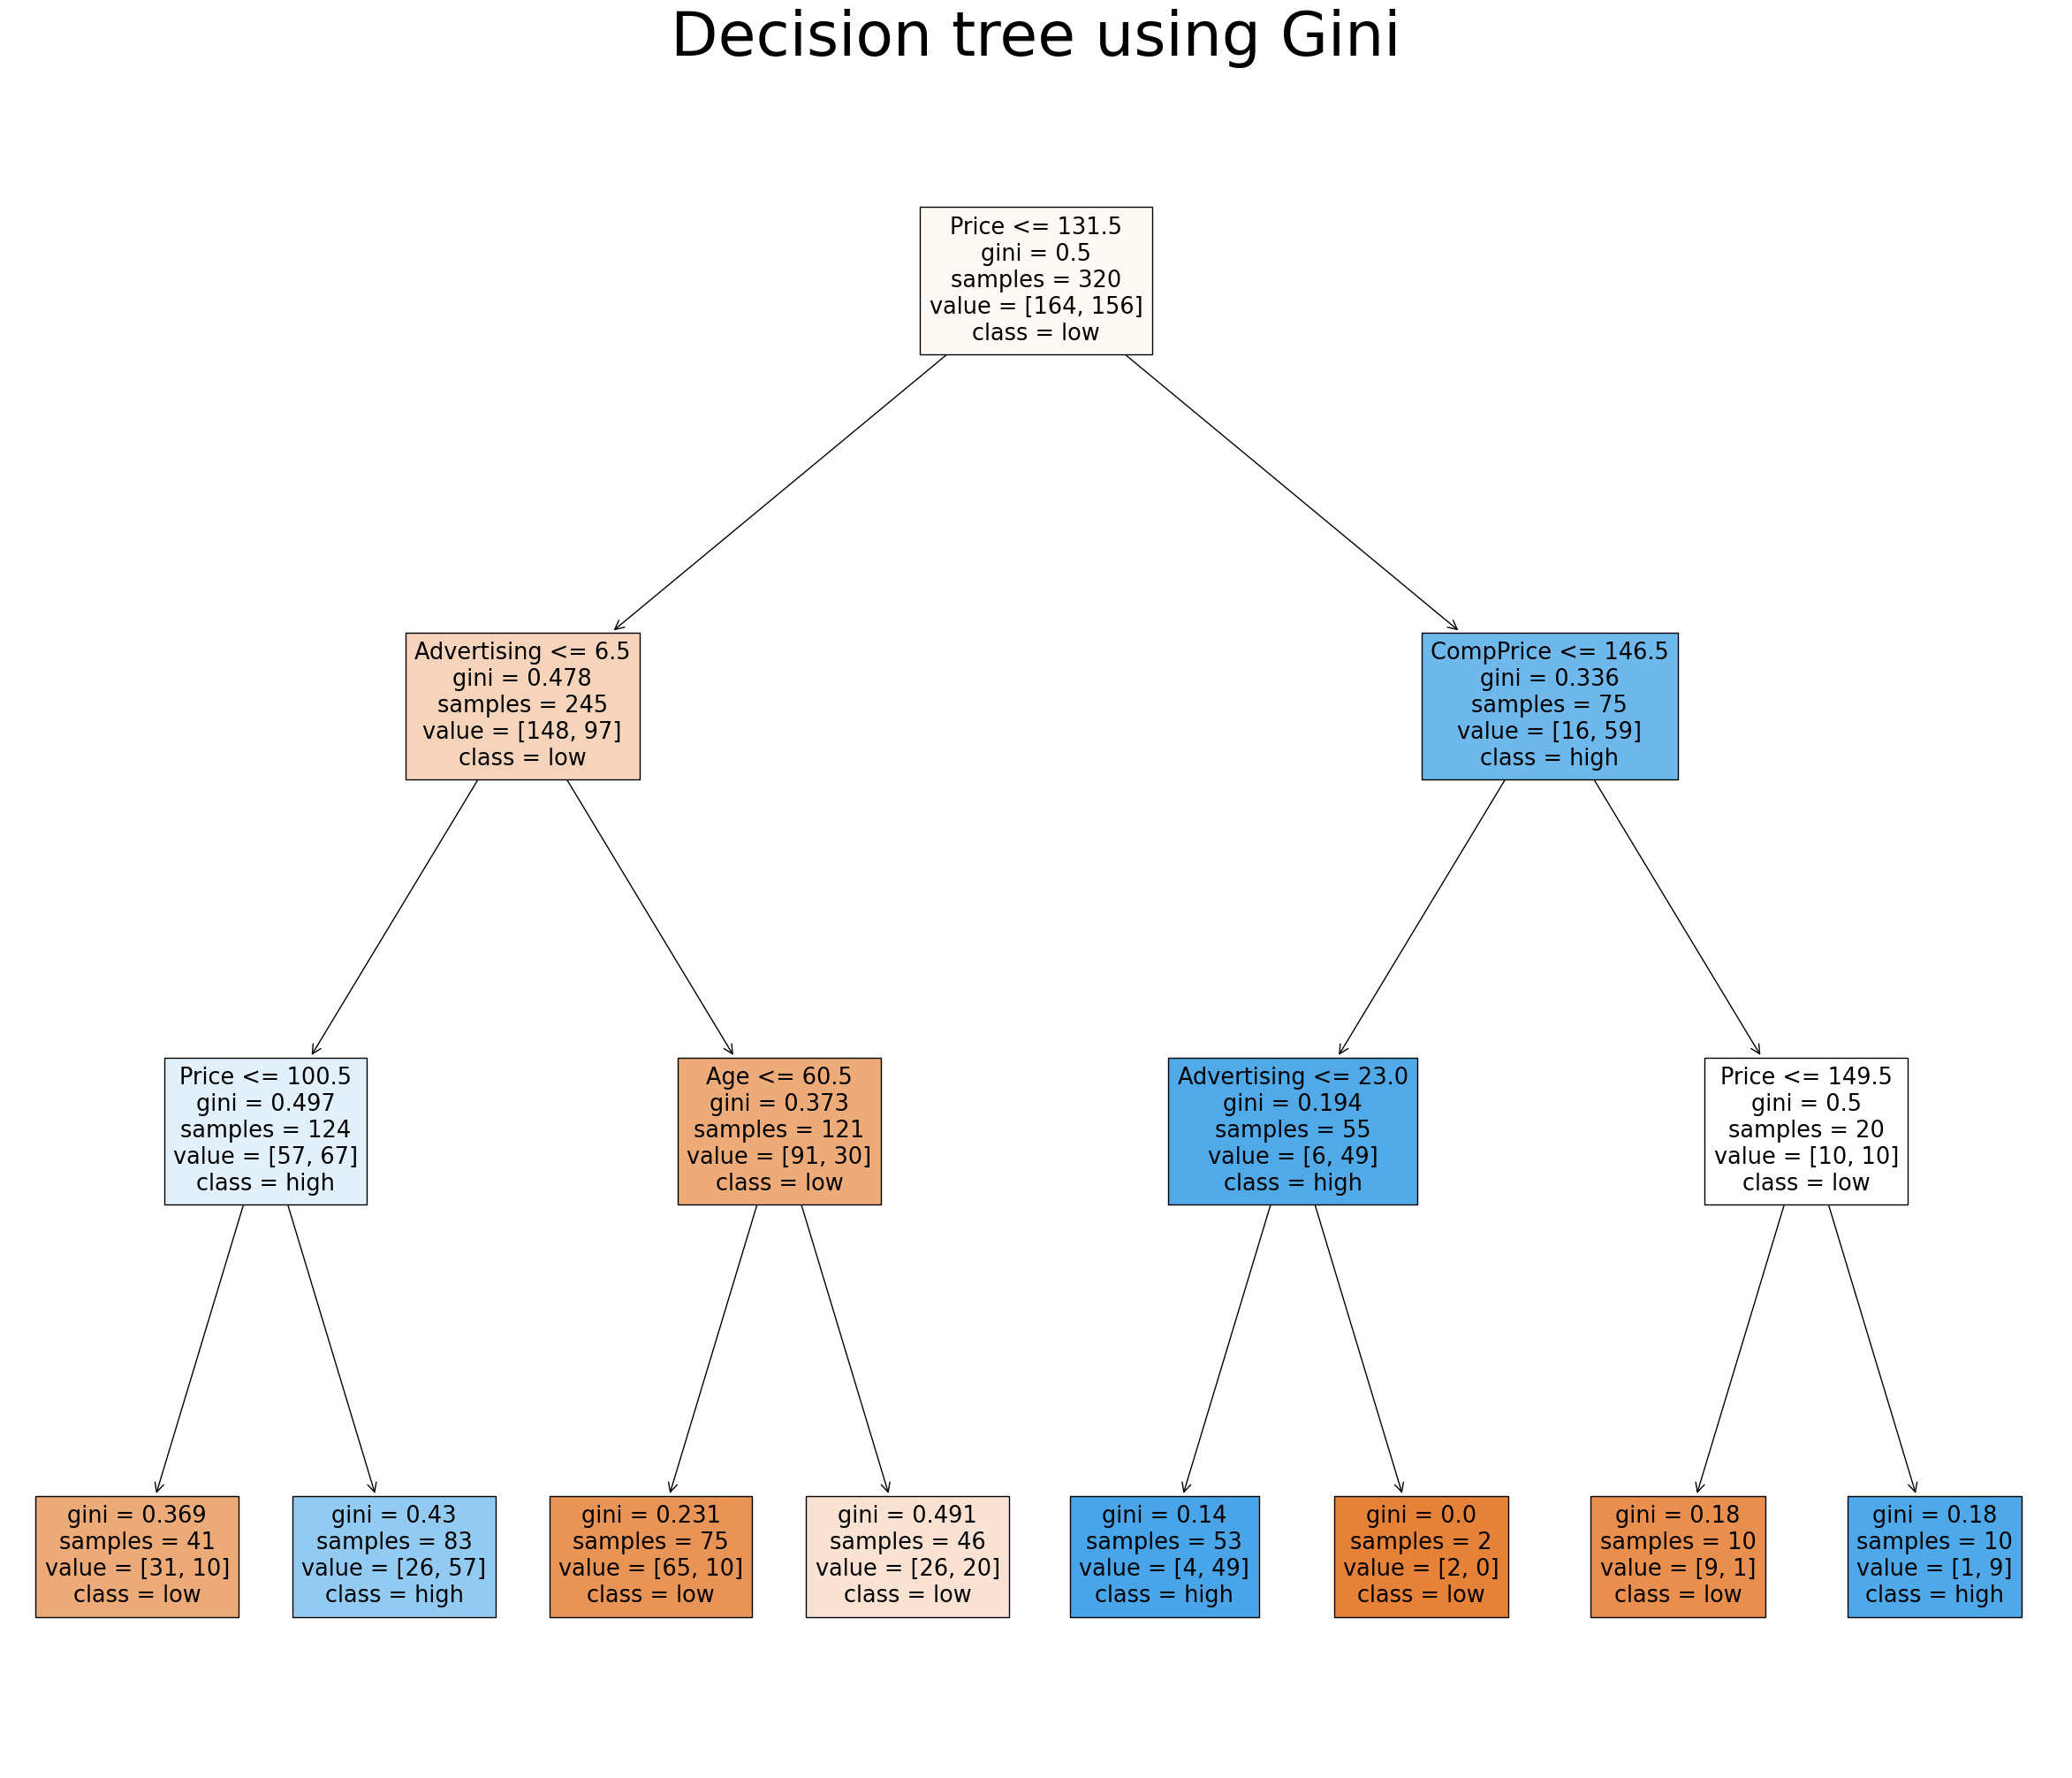

In [84]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=50)
plt.savefig('DT_Gini.pdf')

In [86]:
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

high    42
low     38
dtype: int64

In [87]:
pd.crosstab(y_test,preds)

col_0,high,low
Company_Val,,
high,27,8
low,15,30


In [89]:
np.mean(preds==y_test)*100

71.25